# 🧼 Limpieza del set de datos 🧼

Primero, vamos a extraer las columnas que nos interesan para nuestro análisis.

In [1]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv("files/hr_raw_data.csv", index_col=0)

pd.set_option("display.max_columns", None)

In [2]:
raw_df.head(3)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1


In [3]:
raw_df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'sameasmonthlyincome', 'datebirth', 'salary',
       'roledepartament', 'numberchildren', 'remotework'],
      dtype='object')

Columna jobrole: 

Sales Executive               381

Research Scientist            325

Laboratory Technician         289

Manufacturing Director        168

Healthcare Representative     155

Manager                       115

Sales Representative           96

Research Director              90

Human Resources                59

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='yearswithcurrmanager', ylabel='yearssincelastpromotion'>

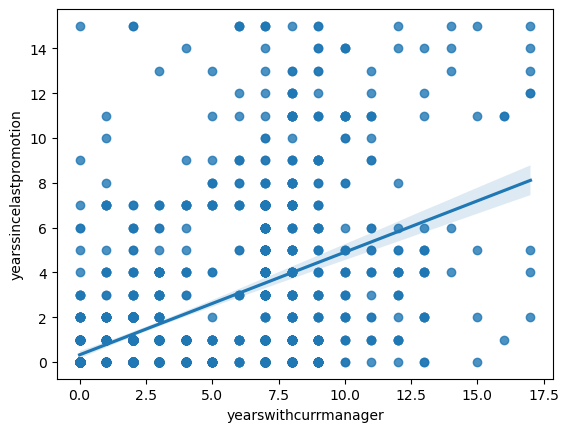

In [5]:
sns.regplot(x= 'yearswithcurrmanager',
                y = 'yearssincelastpromotion', 
                data = raw_df)

In [86]:
df = pd.DataFrame()

columns_to_import = ["employeenumber","datebirth", "remotework", "education", "gender", "stockoptionlevel", 
                     "percentsalaryhike", "salary", "monthlyincome", "joblevel", "jobrole", "relationshipsatisfaction", 
                     "environmentsatisfaction", "jobsatisfaction", "yearssincelastpromotion", "yearswithcurrmanager"]

for col in columns_to_import:
    df[col] = raw_df[col] 

In [7]:
df.head()

,employeenumber,datebirth,remotework,education,gender,stockoptionlevel,percentsalaryhike,salary,monthlyincome,joblevel,jobrole,relationshipsatisfaction,environmentsatisfaction,jobsatisfaction,yearssincelastpromotion,yearswithcurrmanager
0,1,1972,Yes,3,0,0,13,"195370,00$","16280,83$",5,resEArch DIREcToR,3,1,3,15,15
1,2,1971,1,4,0,1,14,"199990,00$",NaN,5,ManAGeR,1,3,3,11,9
2,3,1981,1,2,0,0,11,"192320,00$",NaN,5,ManaGER,4,3,4,11,15
3,4,1976,False,4,1,2,19,"171690,00$","14307,50$",4,ReseArCH DIrECtOr,2,1,3,5,6
4,5,1977,0,3,1,1,12,NaN,"12783,92$",4,sAleS EXECUtIve,4,1,1,2,8


## Limpiando las columnas elegidas

Primero, quitar duplicados

In [8]:
df.duplicated().sum()

64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

Gender: cambiar 1 y 0 por Female y Male.

In [11]:
df['gender'] = df['gender'].map({0: 'F', 1: 'M'})

In [12]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

Remote work: unificar valores

In [13]:
df['remotework'] = df['remotework'].astype(str).str.lower()
df['remotework'] = df['remotework'].replace({
                   'true': 'yes', 'false': 'no', 
                   '1': 'yes', '0': 'no'})

In [14]:
df['remotework'].unique()

array(['yes', 'no'], dtype=object)

Salary y Monthly income: Quitar símbolos y pasarlo a float.

In [67]:
def clean_money(*args):
    resultados = []
    for dato in args:
        try:
            resultados.append(float(dato.replace('$', '').replace(',', '.')))
        except: 
            resultados.append(np.nan)
    return resultados if len(resultados) > 1 else resultados[0]

In [87]:
df[["monthlyincome","salary"]] = df.apply(lambda x: clean_money(x["monthlyincome"], x["salary"]), axis=1, result_type="expand")

In [88]:
df[["monthlyincome","salary"]]

,monthlyincome,salary
0,16280.83,195370.00
1,NaN,199990.00
2,NaN,192320.00
3,14307.50,171690.00
4,12783.92,NaN
...,...,...
1673,3949.17,NaN
1674,15943.72,191324.62
1675,NaN,28111.13
1676,8339.32,100071.84


Jobrole: ponerlo todo lower case.

In [17]:
df['jobrole'] = df['jobrole'].str.strip().str.replace(" ", "_").str.lower()

In [18]:
df['jobrole']

0            research_director
1                      manager
2                      manager
3            research_director
4              sales_executive
                 ...          
1609           sales_executive
1610     laboratory_technician
1611           sales_executive
1612           sales_executive
1613    manufacturing_director
Name: jobrole, Length: 1614, dtype: object

## Nulos en Salary

Como tenemos monthltincome podemos obtener salary multiplicándolo por 12.

In [89]:
df["salary"].describe()

count      1393.000000
mean      65070.911587
std       45849.510802
min       10090.000000
25%       28111.130000
50%       53914.110000
75%       94390.000000
max      199990.000000
Name: salary, dtype: float64

In [95]:
df[["monthlyincome", "salary"]].isna().sum()

monthlyincome    489
salary           285
dtype: int64

In [96]:
df["salary_from_month"] = df["monthlyincome"]*12 

In [97]:
df[["salary", "salary_from_month"]]

,salary,salary_from_month
0,195370.00,195369.96
1,199990.00,NaN
2,192320.00,NaN
3,171690.00,171690.00
4,NaN,153407.04
...,...,...
1673,NaN,47390.04
1674,191324.62,191324.64
1675,28111.13,NaN
1676,100071.84,100071.84


In [105]:
df['salary'] = df['salary'].fillna(df['salary_from_month'])

In [107]:
df['salary'].isna().sum()

0